<a href="https://colab.research.google.com/github/Elfeny7/PCVK_Sem5/blob/main/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ikmal Faris Musyaffa / 2141720123 / 12 / 3B

PCVK Minggu2

In [111]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt

In [112]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


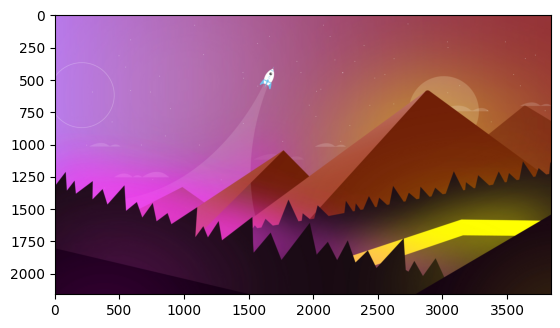

In [113]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/gambar.jpg')
plt.imshow(img)

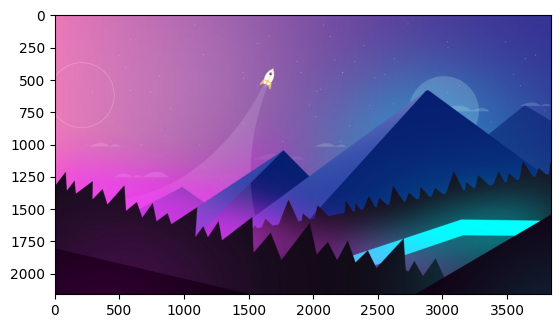

In [114]:
img2 = img
img3 = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img3)

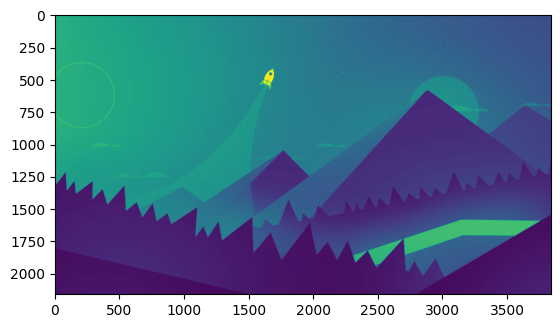

In [115]:
img_gray = cv.imread('/content/drive/MyDrive/PCVK/Images/gambar.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img_gray)

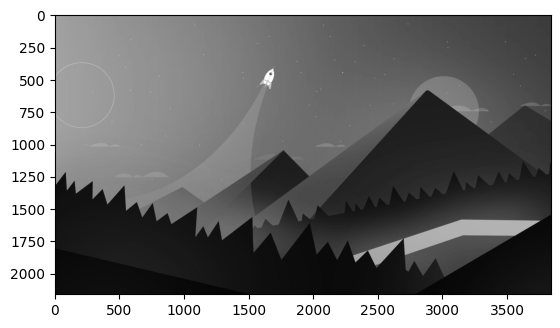

In [116]:
plt.imshow(img_gray, cmap='gray')

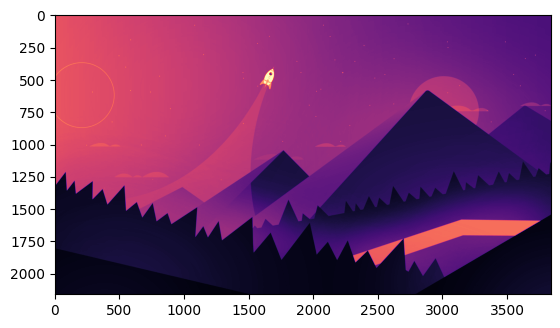

In [117]:
plt.imshow(img_gray, cmap='magma')

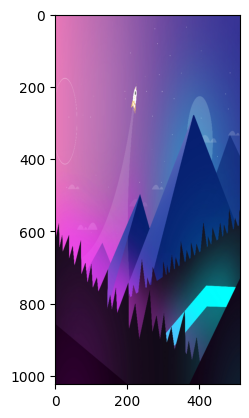

In [118]:
img4 = cv.resize(cv.cvtColor(img,cv.COLOR_BGR2RGB), (512,1024))
plt.imshow(img4)

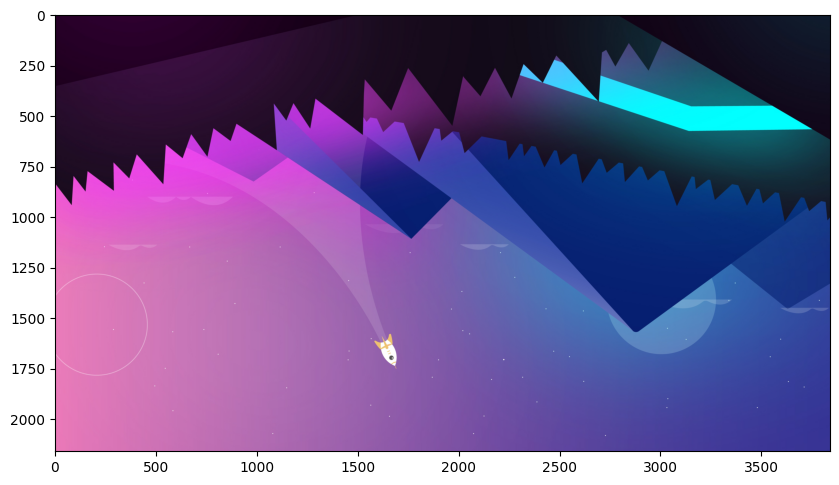

In [119]:
img5 = cv.flip(cv.cvtColor(img,cv.COLOR_BGR2RGB),0)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.imshow(img5)

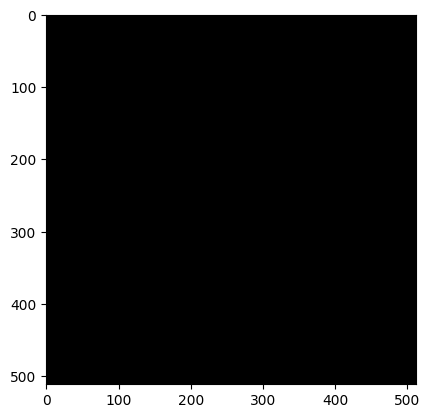

In [120]:
black_img = np.zeros(shape=(512,512,3),dtype=np.int16)
plt.imshow(black_img)

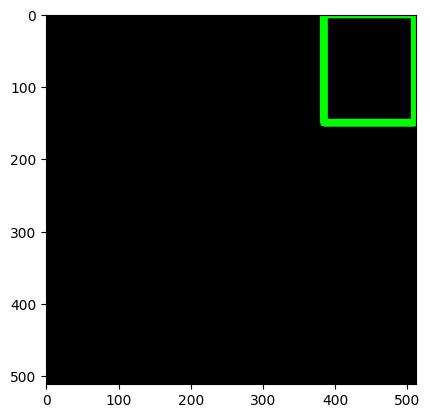

In [121]:
cv.rectangle(black_img,pt1=(384,0),pt2=(510,150),color=(0,255,0),thickness=10)
plt.imshow(black_img)

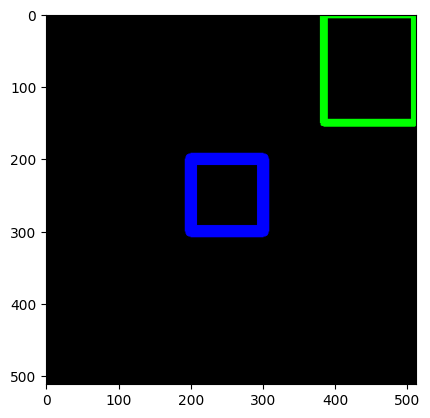

In [122]:
cv.rectangle(black_img,pt1=(200,200),pt2=(300,300),color=(0,0,255),thickness=15)
plt.imshow(black_img)

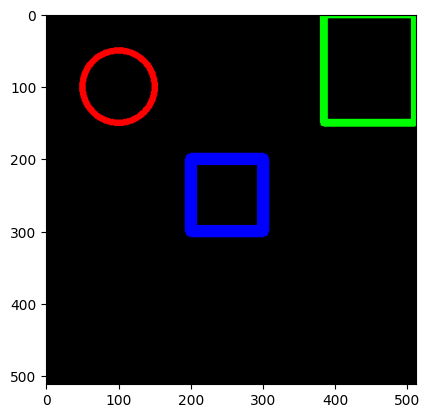

In [123]:
cv.circle(black_img,center=(100,100),radius=50,color=(255,0,0),thickness=8)
plt.imshow(black_img)

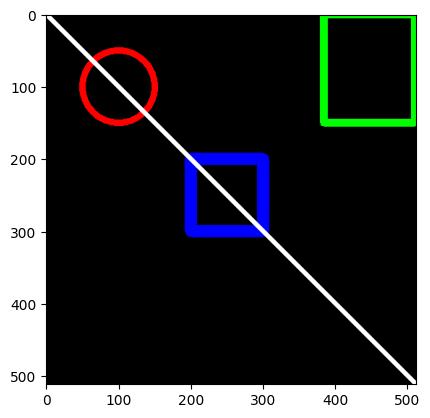

In [124]:
cv.line(black_img,pt1=(0,0),pt2=(512,512),color=(255,255,255),thickness=5)
plt.imshow(black_img)

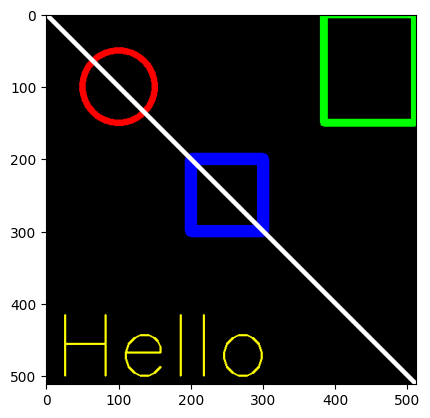

In [125]:
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(black_img,text='Hello',org=(10,500),fontFace=font,fontScale=4,color=(255,255,0),thickness=2,lineType=cv.LINE_AA)
plt.imshow(black_img)

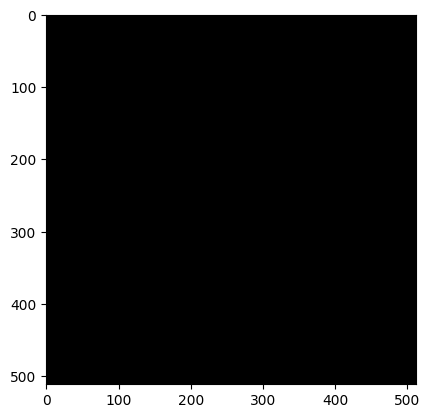

In [126]:
black_img2=np.zeros(shape=(512,512,3),dtype=np.int32)
plt.imshow(black_img2)

In [127]:
vertices = np.array([[100,300],[200,200],[400,300],[200,400]],dtype=np.int32)
vertices

array([[100, 300],
       [200, 200],
       [400, 300],
       [200, 400]], dtype=int32)

In [128]:
pts = vertices.reshape((-1,1,2))
pts

array([[[100, 300]],

       [[200, 200]],

       [[400, 300]],

       [[200, 400]]], dtype=int32)

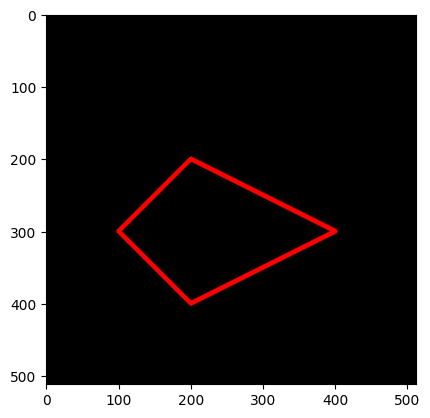

In [129]:
cv.polylines(black_img2,[pts],isClosed=True,color=(255,0,0),thickness=5)
plt.imshow(black_img2)

###**Pertanyaan**

1. Apakah perbedaan gambar yang ditampilkan tanpa dan dengan matplotlib?

Jawab :

**Terdapat ukuran 0-width dan 0-height seperti penggaris**

2. Apakah perbedaan dan pengaruhnya pembuatan black image antara tipe data int16
dan int32?

Jawab :

**Tidak ada**

3. Apakah kegunaan “google.colab.patches import cv2_imshow” pada potongan kode
berikut

Jawab :

**Untuk menampilkan gambar tanpa jendela pop up terpisah**

4. Apakah kegunaan “skimage import io” pada potongan kode soal nomor 3

Jawab :

**Untuk memproses gambar (menulis, menampilkan, dll)**

###**TUGAS**

1. Dengan menggunakan figsize, perhatikan apakah ukuran image pixelnya juga
berubah?

Jawab :

**Tidak berubah, hanya mengubah tampilan gambar, tidak mempengaruhi pixel**

2. Tampilkan image dalam channel Red-Blue dan Green-Blue saja!

Jawab :

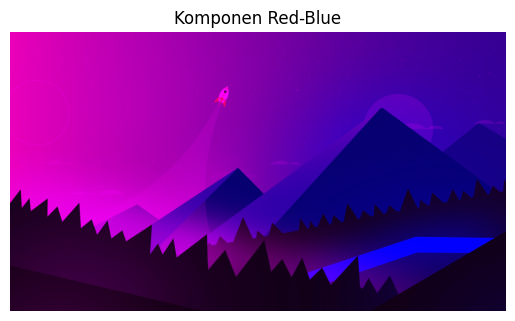

In [130]:
red_blue_img = img2.copy()
red_blue_img[:, :, 1] = 0  # Menonaktifkan saluran hijau (green channel)

# Menampilkan gambar merah-biru
plt.imshow(cv.cvtColor(red_blue_img, cv.COLOR_BGR2RGB))
plt.title('Komponen Red-Blue')
plt.axis('off')
plt.show()

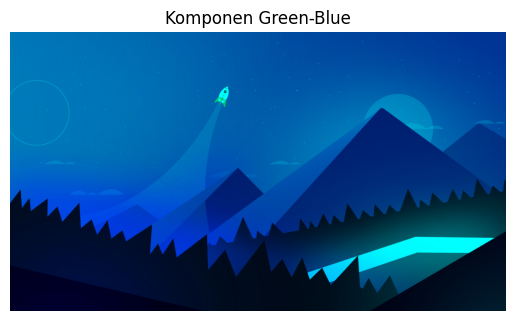

In [131]:
green_blue_img = img2.copy()
green_blue_img[:, :, 2] = 0  # Menonaktifkan saluran merah (red channel)

# Menampilkan gambar hijau-biru
plt.imshow(cv.cvtColor(green_blue_img, cv.COLOR_BGR2RGB))
plt.title('Komponen Green-Blue')
plt.axis('off')
plt.show()

3. Tampilkan image baris ke 20-115, kolom 25-120

Jawab :

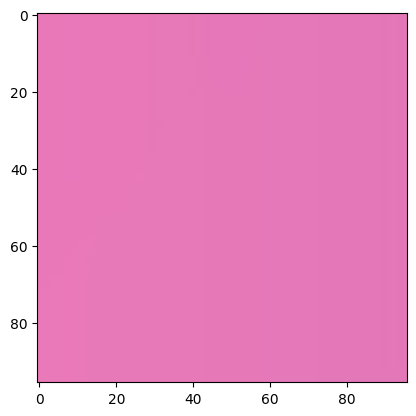

In [132]:
cropped_img = img[20:116, 25:121]
cropped_rgb_img = cv.cvtColor(cropped_img, cv.COLOR_BGR2RGB)
plt.imshow(cropped_rgb_img)

4. Tampilkan image baris ke 5-30, semua kolom, channel Red saja!

Jawab :

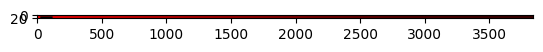

In [134]:
cropped_img2 = img[5:30, :]
cropped_img2[:, :, 1] = 0
cropped_img2[:, :, 0] = 0
cropped_rgb_img2 = cv.cvtColor(cropped_img2, cv.COLOR_BGR2RGB)
plt.imshow(cropped_rgb_img2)

5. Buat 5 kotak berbagai ukuran dan warna yang berbeda dalam satu image.
disarankan menggunakan bilangan acak/random!

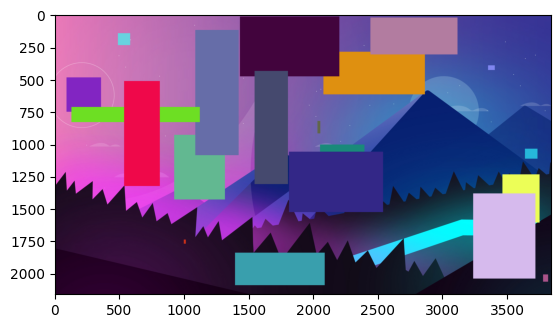

In [139]:
import random

# Jumlah kotak yang akan dibuat
num_boxes = 5

img_berkotak = img3.copy()

# Membuat dan menampilkan kotak-kotak dengan ukuran, posisi, dan warna acak
for _ in range(num_boxes):
    # Ukuran kotak acak (panjang dan lebar)
    box_width = random.randint(10, 1000)
    box_height = random.randint(10, 1000)

    # Posisi kotak acak (x dan y)
    x = random.randint(0, img_berkotak.shape[1] - box_width)
    y = random.randint(0, img_berkotak.shape[0] - box_height)

    # Warna kotak acak (BGR)
    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

    # Menggambar kotak di atas gambar
    cv.rectangle(img_berkotak, (x, y), (x + box_width, y + box_height), color, -1)  # -1 mengisi kotak dengan warna

# Menampilkan gambar dengan kotak-kotak
plt.imshow(img_berkotak)
cv.waitKey(0)
cv.destroyAllWindows()